In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

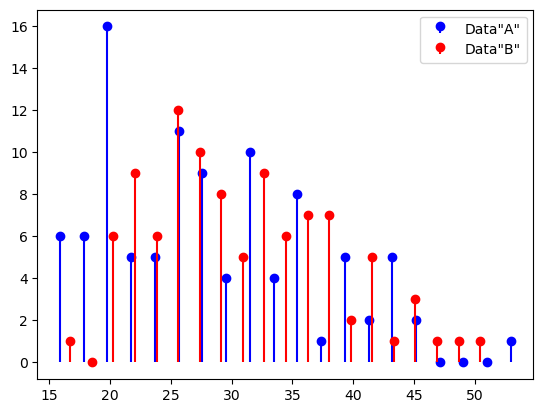

In [3]:
N = 100

r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataA = 26-r*10

yA,xA = np.histogram(dataA,20)
xA = (xA[:-1]+xA[1:])/2

r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataB = 30-r*10

yB,xB = np.histogram(dataB,20)
xB = (xB[:-1]+xB[1:])/2

plt.stem(xA,yA,'b',markerfmt='bo',basefmt=' ',label='Data"A"')
plt.stem(xB,yB,'r',markerfmt='ro',basefmt=' ',label='Data"B"')
plt.legend()
plt.show()

In [5]:
alldata = np.hstack((dataA,dataB))

conds = np.hstack((np.ones(N),2*np.ones(N)))
print(alldata)
print(conds)

[25.35619993 17.23279899 24.8005953  30.7639659  28.35992846 20.68667994
 31.10575756 19.28878137 25.50961473 20.54222196 39.64846107 32.44221275
 34.79424777 23.5927842  44.07975311 39.13129228 36.05620533 16.2771869
 26.09032112 31.91503281 34.94318272 26.59349558 26.40009416 21.90028339
 18.73379648 20.85652282 27.13266932 32.25512397 17.16823504 26.86018059
 35.54064106 27.0070075  20.21132388 35.02638275 23.93682719 18.10219259
 45.2703361  43.16917908 19.78571007 14.93814079 18.96466401 22.25293076
 20.08948452 25.11399043 19.49300917 27.36037151 35.69399972 19.31544494
 42.58528405 22.42144814 32.31213    25.9878862  36.58205006 16.00067005
 27.1108702  32.41255505 40.11018466 32.69409854 26.43793309 27.06575836
 19.62710804 20.33545449 26.18585825 39.51918549 16.18820702 15.13317231
 27.03046175 31.05855811 29.29652878 40.73303364 31.323821   43.52585702
 20.15685105 17.00559987 18.61653906 53.92586682 35.89702915 22.77560972
 43.88424787 45.39641188 22.89071784 19.06011619 32.

In [7]:
fakeconds = np.random.permutation(N*2)

fakeconds[fakeconds<N] = 1
fakeconds[fakeconds>1] = 2

print([np.mean(alldata[conds==1]), np.mean(alldata[conds==2])])

print([np.mean(alldata[fakeconds==1]), np.mean(alldata[fakeconds==2])])

[27.995620818546307, 30.80619580661628]
[29.312237452263833, 29.489579172898743]


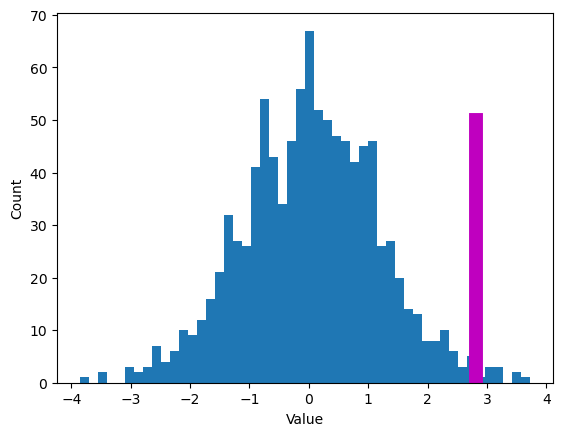

In [8]:
nPerms = 1000
permdiffs = np.zeros(nPerms)

for permi in range(nPerms):
    fconds = np.random.permutation(N*2)
    fconds[fconds<N] = 1
    fconds[fconds>1] = 2
    permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])
    
plt.hist(permdiffs,50)

obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])
plt.plot([obsval, obsval],[0,50],'m',linewidth=10)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [9]:
zVal = (obsval-np.mean(permdiffs)) / np.std(permdiffs,ddof=1)
p = 1-stats.norm.cdf(abs(zVal))

pCount = sum(permdiffs>obsval)/nPerms

print(p,pCount)

0.007900061996192753 0.01
